# Aufgabe 2

"Wie viele Kinder sind typisch?“ <br>

In einer Stichprobe haben 3378 Frauen keine Kinder, <br>
3107 Frauen haben eins,<br>
2459 Frauen zwei,<br>
511 Frauen drei und<br>
26 Frauen vier Kinder.


Welchen Diagrammtyp würden Sie zur Veranschaulichung der Daten wählen? 

Welches Lage- bzw. Streumass scheint Ihnen angemessen zu sein? Berechnen Sie diese
Kennzahlen und entscheiden Sie, ob die Streuung gross oder klein ist.

## a) Diagramtyp für grafische Interpretation der Daten

Da die Daten qualitative Merkmale beschreiben, eignet sich eine Ordinalskala und ein Säulendiagmram zur Darstellung.
Ein Kreisdiagram wäre ebenfalls geeignet.

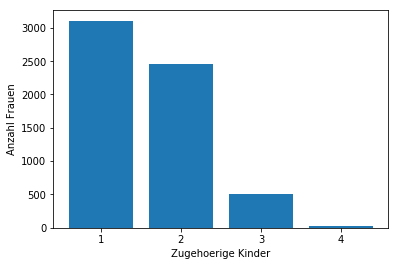

In [37]:
from matplotlib import pyplot as plt

children = ["1", "2", "3", "4"]
women = [3107, 2459, 511, 26]

plt.bar(children, women)
plt.ylabel('Anzahl Frauen')
plt.xlabel('Zugehoerige Kinder')
plt.show()

Da d

## b) Lagemass

Lt. Aufgabenstellung ist hier die Anzahl der Kinder relevant. Die Daten sind entsprechend gewichtet basierend auf der Anzahl der Frauen. Ferner sind die Daten sind linksschief ($x_{mod} <= \tilde{x} <= \bar{x}$). Der Median entspricht somit dem Modalwert.
Als Lagemass eignen sich Perzentile.

In [79]:
def calc_cumulated_probabilities(input_dict):
    #get sum of values
    n = 0.0
    for key, value in reversed(sorted(input_dict.items())):
        n = n + value
    # create a map with relative probabilities
    empirical_probabilities = {}
    for key, value in reversed(sorted(input_dict.items())):
        # count appearances of current value
        # current relative empirical probability)
        current_relative_probability = value / n
        # map value to value's relative empirical probability
        empirical_probabilities.update({key: current_relative_probability})
    # current cumulated value
    cumulated_value = 0.0
    # map of values and their cumulated probabilities
    cumulated_probabilities = {}
    for key, value in reversed((empirical_probabilities.items())):
        cumulated_value = cumulated_value + value
        cumulated_probabilities.update({key: cumulated_value})
    print("\n##### Values and their empirical probabilities ###")
    print((empirical_probabilities))
    print("\n##### Values and their cumulated empirical probabilities ###")
    print(cumulated_probabilities)
    return cumulated_probabilities

def calc_quantile(cumulated_probabilities, p):
    quantile = 0.0
    for key, value in reversed(cumulated_probabilities.items()):
        if value >= p:
            quantile = key
            break
    print("\n##### " + str(p) + "-Quantil ###")
    print(quantile)
    return quantile


sample = {"4": 26, "3": 511, "2": 2459, "1": 3107}
cumulated_probabilities = calc_cumulated_probabilities(sample)
calc_quantile(cumulated_probabilities, 0)
calc_quantile(cumulated_probabilities, 0.25)
calc_quantile(cumulated_probabilities, 0.5)
calc_quantile(cumulated_probabilities, 0.75)
calc_quantile(cumulated_probabilities, 1)    


##### Values and their empirical probabilities ###
{'1': 0.5090938882516794, '3': 0.08372931345240046, '2': 0.40291659839423233, '4': 0.004260199901687694}

##### Values and their cumulated empirical probabilities ###
{'1': 1.0, '3': 0.4909061117483205, '2': 0.40717679829592, '4': 0.004260199901687694}

##### 0-Quantil ###
4

##### 0.25-Quantil ###
2

##### 0.5-Quantil ###
1

##### 0.75-Quantil ###
1

##### 1-Quantil ###
1


'1'

Ein weiteres Lagemass für die Stichprobe ist der gewichtete empirische Mittelwert wobei der Zielwert durch die Anzahl der Kinder und die Gewichtung durch die Anzahl der Frauen repräsentiert wird.

In [41]:
def calc_weighted_mean(sample, weights):
    weighted_sample_sum = 0.0
    for i in range(len(children)):
        weighted_sample_sum = weighted_sample_sum + (children[i]*weights[i])
    weights_sum = 0.0
    for item in weights:
        weights_sum = weights_sum + item
    weighted_mean = weighted_sample_sum / weights_sum
    return weighted_mean

children = [1, 2, 3, 4]
weights = [3107, 2459, 511, 26]

calc_weighted_mean(children, weights)

1.5831558250040962

## b) Streumass

Als Streumass eignet sich die empirische Varianz.

In [53]:
def calc_variance(sample, weights):
    n = len(sample)
    mean = calc_weighted_mean(sample, weights)
    temp = 0.0
    for item in sample:
        temp = temp + (item - mean)**2
    return (1.0/(n - 1.0)) * temp

children = [1, 2, 3, 4]
weights = [3107, 2459, 511, 26]

calc_variance(children, weights)

2.787470988298559

Resultat: für den Wertebereich 1-4 und dem empirischen Mittelwert 1.5 ist die Streuug mit einem Wert von 2.7 gross.

Als grafische Darstellung der Streuung sowie der Lage eignet sich ein Boxplot. Hier kann abgelesen werden, dass 4 Kinder einen Aussreisser darstellen.

{'boxes': [<matplotlib.lines.Line2D at 0x7f36619ea690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f36619f6050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f36619f6c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f36619f6850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f36619ea750>,
  <matplotlib.lines.Line2D at 0x7f36619eac10>]}

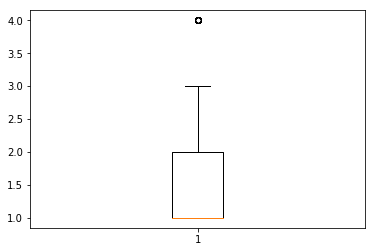

In [77]:
import numpy as np

one =np.arange(3107) 
two = np.arange(2459)
three = np.arange(511)
four = np.arange(26)
one.fill(1)
two.fill(2)
three.fill(3)
four.fill(4)

data = np.concatenate((one, two, three, four))
plt.boxplot(data)

Des weiteren können Perzentilbänder das Schiefmass darstellen. Hier wird statt dem Median, der Mittelwert angezeigt. 

{'boxes': [<matplotlib.lines.Line2D at 0x7f3661755450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3661755dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f366174ea10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f366174e610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3661755510>,
  <matplotlib.lines.Line2D at 0x7f36617559d0>]}

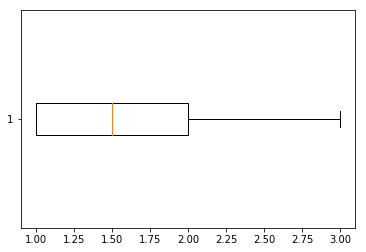

In [84]:
percentiles = np.percentile(data, [5, 10, 25, 75, 90, 95])
plt.boxplot(percentiles, 0, 'rs', 0)

In [91]:
def calc_skewness(sample, weights):
    n = len(sample)
    mean = calc_weighted_mean(sample, weights)
    counter = 0.0
    denominator = 0.0
    for item in sample:
        counter = counter + (item - mean)**3
        denominator = counter + (item - mean)**2
    counter = counter/n
    denominator = (denominator/n)**(3/2)
    return counter / denominator

children = [1, 2, 3, 4]
weights = [3107, 2459, 511, 26]

calc_skewness(children, weights)

0.742415797379892